# Recurrent Neural Network (RNN)

In this notebook, we are working with Google Stock price data, and we will try to predict the stock price. We have data collected from the year 2012 to 2017. The dataset is already divided into training set and test set.

## Part 1 Data Preprocssing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Importing the data set
data = pd.read_csv("Google_Stock_Price_Train.csv")
training_data = data.iloc[:,1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
scaled_training_data = sc.fit_transform(training_data)

# Creatuiing a data structure with 60 timestamps and 1 output
X_train=[]
y_train=[]
for i in range(60,1258):
    X_train.append(scaled_training_data[i-60:i, 0])
    y_train.append(scaled_training_data[i,0])

X_train = np.array(X_train)
y_train = np.array(y_train)

# Reshaping as 3dtensor as RNN expects input like that
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))


## Part 2 Building the RNN

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

# Initialize the RNN
regressor = Sequential()

# Adding first LSTM layer with Dropout Regularization
regressor.add(LSTM(units=50, return_sequences= True, input_shape= (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding Second LSTM layer with Dropout Regularization
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

# Adding Third LSTM layer with Dropout Regularization
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))

# Adding Fourth/last LSTM layer with Dropout Regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

# Fitting the training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Using TensorFlow backend.


Epoch 1/100
1198/1198 [==============================] - 7s 6ms/step - loss: 0.0455
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0061
Epoch 3/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0051
Epoch 4/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0049
Epoch 5/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0054
Epoch 6/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0047A: 1s - l
Epoch 7/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0044
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0049
Epoch 9/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0041
Epoch 10/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0044
Epoch 11/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0043
Epoch 12/100
1198/1198 [==============================] - 4s 3ms/

1198/1198 [==============================] - 4s 3ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0016
Epoch 100/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0014


## Part 3 Making the prediction

In [15]:
# Getting the test set now
data_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = data_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((data['Open'], data_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(data_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

##  Visualizing the results

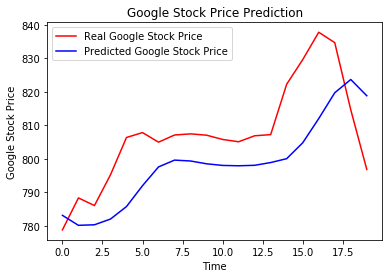

In [16]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

It is almost predicting the trend which is happening, as this stock prediction, we are not interested in the closeness of the value. But, we are interested in the trned whether it will go up pr down in furture.